In [95]:
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.providers.aer import AerSimulator
from qiskit.quantum_info import Statevector
import numpy as np


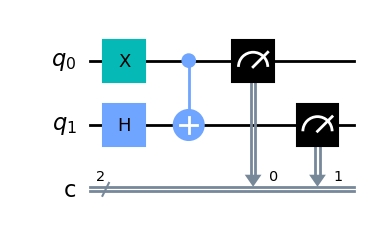

In [92]:
## middle parts

test_middle = QuantumCircuit(2, 2)
test_middle.x(0)

test_middle.h(1)
test_middle.cx(0, 1)
#test_middle.h(1)


test_middle.measure([0, 1], [0,1])

test_middle.draw('mpl')


In [89]:
st = Statevector(test_middle)
st.draw('latex')

<IPython.core.display.Latex object>

In [107]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(test_middle, backend, shots=1)
job.result().get_counts()

{'01': 1}

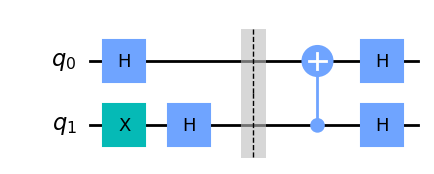

In [ ]:
from math import pi

test_one = QuantumCircuit(2)

#test_one.x(0)
test_one.x(1)

test_one.h(0)
test_one.h(1)

test_one.barrier()


#test_one.x(0)

#test_one.cz(0, 1)
test_one.cx(1, 0)



test_one.h(0)
test_one.h(1)
#test_one.cx(0, 1)


test_one.draw('mpl')

In [ ]:
st = Statevector(test_one)
st.draw('latex')

<IPython.core.display.Latex object>

In [149]:
class Map:
    def __init__(self):
    
        self.total_qubits = 12
        self.total_bits = 12
        self.circuit = QuantumCircuit(self.total_qubits, self.total_bits)

        self.actual_states = list(np.zeros(self.total_qubits, dtype=np.int8))

        self.map = []

        self.simulator = BasicAer.get_backend('qasm_simulator')

        # private attributes
        zero_basis = [1, 0]
        one_basis = [0, 1]
        basis_states = [zero_basis, one_basis]
    
    def update_states_list(self, states):
        self.actual_states = states
        
    def create_walls(self):
        if(self.needs_to_update_walls_qubits_values()):
            self.update_walls_qubits_values()
            self.update_state_wall_values()
    
    def needs_to_update_walls_qubits_values(self):
        return not(self.actual_states[0]) and not(self.actual_states[-1])

    def update_walls_qubits_values(self):
        self.circuit.x(0)
        self.circuit.x(-1)
        
    def update_state_wall_values(self):
        self.actual_states[0] = 1
        self.actual_states[-1] = 1
        
    
    def create_measurements(self):
        total_qbits_to_measure = list(range(self.total_qubits))
        total_bits_to_measure = list(range(self.total_bits))
        self.circuit.measure(total_bits_to_measure, total_bits_to_measure)
        
    
    def save_simulation_results(self):
        simulation_result = self.get_simulation_result()
        self.update_states_list(simulation_result)
        self.update_map()
    
    
    def get_simulation_result(self):
        job = execute(self.circuit, self.simulator, shots=1)
        results = job.result().get_counts()
        result_bits_sequence = list(results.keys())[0]
        result_bits_sequence_as_integers_list = list( map(int, list(result_bits_sequence)) )    
        
        return result_bits_sequence_as_integers_list
    
    def update_map(self):
        self.map.append(self.actual_states)
        
    def show_map(self):
        for line in self.map:
            print(*line)
    
    def show_circuit(self):
        print(self.circuit)
        
    def create_next_to_wall_cell(self):
        self.circuit.h(1)
        self.circuit.h(-2)
    
    def createMiddle(self):
        for i in range(2, self.total_qubits - 2, 2):
            
            self.circuit.h(i)
            self.circuit.h(i+1)
            
            self.circuit.ccx(i-1, i+2, i+1)
            #self.circuit.x(i)
            #self.circuit.h(i+1)
            #self.circuit.cx(i, i+1)
    
    def addBarrier(self):
        self.circuit.barrier()
    

In [150]:
gameMap = Map()
for i in range(12):
    gameMap.create_walls()
    gameMap.create_next_to_wall_cell()
    gameMap.createMiddle()
    gameMap.create_measurements()
    gameMap.addBarrier()
    gameMap.save_simulation_results()
gameMap.show_map()
gameMap.show_circuit()

1 1 0 0 1 1 1 0 0 0 1 1
1 0 0 0 0 1 0 1 0 0 0 1
1 0 1 1 1 1 0 0 1 0 1 1
1 1 0 0 0 0 0 1 0 1 1 1
1 1 1 1 1 0 1 0 0 0 0 1
1 1 0 1 1 0 0 1 1 0 1 1
1 0 1 1 0 0 0 1 1 1 1 1
1 1 1 0 0 0 1 0 0 0 0 1
1 0 0 1 1 1 0 0 1 0 0 1
1 0 0 0 1 1 0 0 1 1 0 1
1 1 1 1 0 1 0 0 0 0 1 1
1 0 0 1 1 1 0 0 1 0 0 1
      ┌───┐     ┌─┐                                                            »
 q_0: ┤ X ├─────┤M├────────────────────────────────────────────────────────────»
      ├───┤     └╥┘             ┌─┐                                            »
 q_1: ┤ H ├──■───╫──────────────┤M├────────────────────────────────────────────»
      ├───┤  │   ║ ┌─┐          └╥┘                                            »
 q_2: ┤ H ├──┼───╫─┤M├───────────╫─────────────────────────────────────────────»
      ├───┤┌─┴─┐ ║ └╥┘           ║           ┌─┐                               »
 q_3: ┤ H ├┤ X ├─╫──╫────────■───╫───────────┤M├───────────────────────────────»
      └───┘└─┬─┘ ║  ║ ┌───┐  │   ║           └╥┘┌─┐             

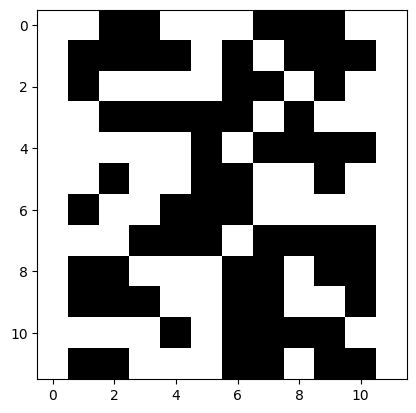

In [151]:
from matplotlib import pyplot as plt
plt.imshow(gameMap.map, interpolation='nearest')
plt.gray()
plt.show()